___

<div>
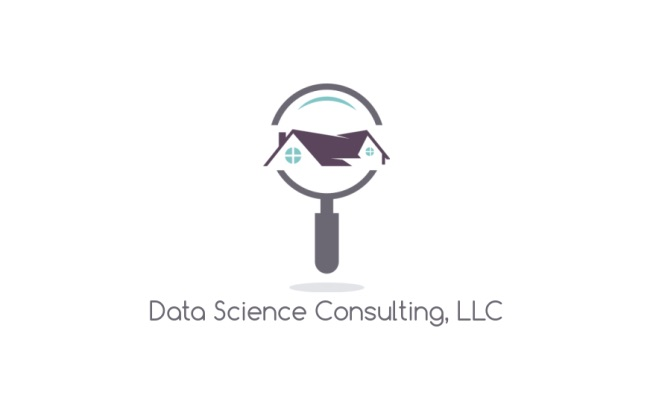
</div>

___

# Regression Analysis

## By: Dionne L. Taylor
## Cohort: O'Neil



## Project Description 
### Regression Project: Estimating Home Value
#### Summarize the findings and insights from the data exploration, modeling, and evaluation steps. Present the results to stakeholders, highlighting how the model meets their requirements and expectations.




## Regression Project Plan



#### 1. Data Cleaning: Removing duplicates, missing values, and irrelevant columns. Dealing with data inconsistencies, such as typos and outliers.

#### 2. Exploratory Data Analysis: Descriptive statistics, visualizations, and hypothesis testing to understand the relationships between variables and identify patterns in the data.

#### 3. Feature Engineering: Creating new features or modifying existing ones to improve model performance.

#### 4. Model Building: Building and testing different machine learning algorithms to predict customer churn.

#### 5. Model Evaluation: Evaluating model performance using metrics such as accuracy, precision, recall, and F1 score.


## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import wrangle
import env
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet


## Data Dictionary

In [3]:
wrangle.data_dict()

,Description
id,Unique identifier for each property
parcelid,"Unique identifier for each property, used in c..."
bedroomcnt,Number of bedrooms in the property
bathroomcnt,Number of bathrooms in the property
fireplacecnt,Number of fireplaces in the property
calculatedbathnbr,Number of bathrooms in the property (including...
calculatedfinishedsquarefeet,"Total finished living area of the property, in..."
fullbathcnt,Number of full bathrooms in the property (incl...
garagecarcnt,"Number of cars that can fit in the garage, if ..."
garagetotalsqft,"Total square footage of the garage, if applicable"


## Data acquisition:
>Use SQL to filter the properties with transactions in 2017.
Join the properties_2017, predictions_2017, and propertylandusetype tables.Extract the required features ('square feet of the home', 'number of bedrooms', and 'number of bathrooms') and the target variable ('taxvaluedollarcnt').

In [4]:
df = wrangle.wrangle_zillow_data()

In [5]:
df

,total_sqft,ensuite_bathrooms,num_rooms,year_built,num_full_baths,lot_sqft,assessed_property_value
11051,1822,2.0,7.0,1965,2.0,7848,328628.0
17769,1537,2.0,0.0,1937,2.0,4763,106336.0
26898,1424,2.0,0.0,1959,2.0,5029,372791.0
10888,1431,2.0,6.0,1961,2.0,6120,305591.0
46196,1200,2.0,0.0,1954,2.0,6118,32047.0
...,...,...,...,...,...,...,...
4465,1816,2.0,0.0,1965,2.0,5384,223833.0
19831,1523,2.0,0.0,1954,2.0,5495,62706.0
21921,1137,2.0,0.0,1953,2.0,6586,409145.0
28373,1531,2.0,0.0,1939,2.0,6749,75262.0


## Hypothesis

H$_0$: There is no linear relationship between total_sqft and assessed_property_value

H$_a$: There is linear relationship between total_sqft and assessed_property_value

In [6]:
wrangle.feature_correlation(df)

Feature: total_sqft
Pearson correlation coefficient: 0.15393939325314962
P-value: 7.639073970864941e-75


Spearman correlation coefficient: 0.14901814140252193
P-value: 3.3608523362765905e-70
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: ensuite_bathrooms
Pearson correlation coefficient: nan
P-value: nan


Spearman correlation coefficient: nan
P-value: nan
Fail to reject the null hypothesis (H0): There is no evidence of a linear relationship'.


Feature: num_rooms
Pearson correlation coefficient: 0.0726156008191545
P-value: 8.378577633088081e-18


Spearman correlation coefficient: 0.07792604675227277
P-value: 2.845047817515245e-20
Reject the null hypothesis (H0): There is a linear relationship'.


Feature: year_built
Pearson correlation coefficient: 0.022057484787797527
P-value: 0.009122129567619775


Spearman correlation coefficient: 0.034562177055926846
P-value: 4.381900961250537e-05
Reject the null hypothesis (H0): There is a linear relationship'.


Fe

## Data validation/QA:
> Check the data types and missing values.
Validate the data by cross-referencing it with the source or any documentation available.
> Use cross-validation to evaluate the performance of different regression models on your dataset.

In [7]:
wrangle.summarize_data(df)

,dtypes,missing_values,unique_values,count,mean,std,min,25%,50%,75%,max
0,int64,0,1235,13973,1487.092178,262.920780,774.0,1281.0,1458.0,1657.0,2220.0
1,float64,0,1,13973,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
2,float64,0,10,13973,2.093323,3.061918,0.0,0.0,0.0,6.0,10.0
3,int64,0,44,13973,1958.323696,9.345620,1937.0,1953.0,1957.0,1964.0,1980.0
4,float64,0,1,13973,2.000000,0.000000,2.0,2.0,2.0,2.0,2.0
5,int64,0,4288,13973,6771.122594,1216.598988,3660.0,5998.0,6653.0,7559.0,9900.0
6,float64,0,11433,13973,317122.783296,199415.975412,26660.0,129431.0,305479.0,451461.0,925000.0


In [8]:
wrangle.cv_evaluation(df)

Linear Regression: Avg. RMSE: 196296.9080, Std. Dev: 4337.4122
Lasso: Avg. RMSE: 196296.9068, Std. Dev: 4337.4193
Ridge: Avg. RMSE: 196296.8843, Std. Dev: 4337.4014
ElasticNet: Avg. RMSE: 196575.5643, Std. Dev: 4290.8662
Decision Tree: Avg. RMSE: 276897.5987, Std. Dev: 5700.3380
Random Forest: Avg. RMSE: 204941.5989, Std. Dev: 3829.8050
Gradient Boosting: Avg. RMSE: 195321.0533, Std. Dev: 4517.4713
XGBoost: Avg. RMSE: 204728.2936, Std. Dev: 3901.2634


## Data exploration:
>Explore the distributions and relationships between the features and the target variable.
Identify any potential outliers or anomalies.

In [ ]:
wrangle.check_feature_importance(df)

In [ ]:
wrangle.feature_elimination(df, n_features_to_select=3)

In [ ]:
wrangle.hist_frequency_chart(df, continuous_vars=['total_sqft', 'year_built', 'lot_sqft', 'num_rooms'])

## Feature engineering:
> Handle missing values using appropriate techniques (imputation, dropping, etc.).
Encode categorical variables if needed.
Remove any features that leak information about the target variable.

In [ ]:
wrangle.get_stats(df, 'assessed_property_value')

In [ ]:
X = X.drop('total_sqft', axis=1)
get_stats(df[X.columns], df['assessed_property_value_scaled'])

## Model selection:
> Split the data into train, validation, and test sets.
Test different regression models (e.g., linear regression, decision tree, random forest, etc.) on the training set to identify the best performing model.

In [ ]:
wrangle.model_selection(df, 'assessed_property_value')

## Model evaluation:
> Evaluate the selected model on the validation set using appropriate metrics (e.g., mean squared error, R-squared, etc.).

In [ ]:
wrangle.model_eval(df, 'assessed_property_value')

## Model interpretation:
> Investigate the importance of individual features in the final model.
Gain insights into the relationships between the features and the target variable.

In [ ]:
best_params = {
    'n_estimators': 200,
    'max_depth': 30,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True
    }

In [ ]:
wrangle.model_interpretation(df, 'assessed_property_value', best_params)

##  Model validation:
> Test the final model on the test set to assess its performance on unseen data.

In [ ]:
target_column = 'assessed_property_value'
wrangle.model_validation(df, target_column)

In [ ]:
# Choose the features you want to plot, e.g., '' and ''
x_feature = 'total_sqft'
y_feature = 'assessed_property_value'

sns.lmplot(x=x_feature, y=y_feature, data=df, height=7, aspect=1.5, scatter_kws={'alpha': 0.5})
plt.title(f'{y_feature} vs {x_feature}')
plt.show()

# Conclusion, Thanks for you time and attention!